# K Means Clustering Algorithm

## Load Libraries and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

## Make Dataset 

In [2]:
n_samples = 100
n_features = 2
n_clusters = 3

In [3]:
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)

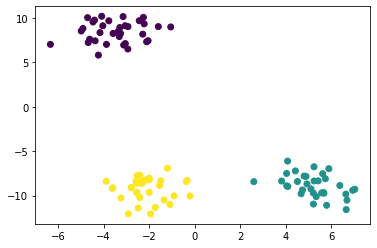

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Scale Data

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

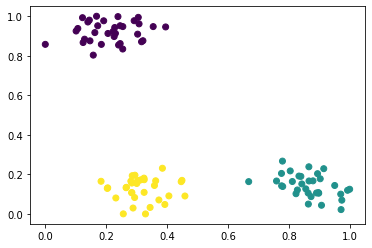

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Initialize Random Cluster Means

In [7]:
def init_cluster_means(n_clusters, n_features):
    return np.random.randn(n_clusters, n_features)

In [8]:
cluster_means = init_cluster_means(n_clusters, n_features)

## K Means Algorithm

In [9]:
def compute_distance(point1, point2):
    diff = point1 - point2
    return np.sum(diff ** 2) ** 0.5

In [10]:
num_iters = 10
for i in range(num_iters):
    
    cluster_ids = []
    for point in X:
        
        curr_cluster = 0
        distance = float('inf')
        
        for cluster_id in range(n_clusters):
            curr_distance = compute_distance(point, cluster_means[cluster_id])
            if curr_distance < distance:
                distance = curr_distance
                curr_cluster = cluster_id
                
        cluster_ids.append(curr_cluster)
        
    cluster_ids = np.array(cluster_ids)
    
    for cluster_id in range(n_clusters):
        curr_cluster_indices = (y == cluster_id)
        curr_cluster_mean = np.mean(X[curr_cluster_indices], axis=0)
        cluster_means[cluster_id] = curr_cluster_mean

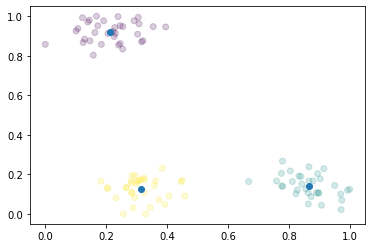

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)
plt.scatter(cluster_means[:, 0], cluster_means[:, 1])
plt.show()